# Time series analysis-IoT telemetry data

## Import libraries

In [94]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

## Read dataset

In [95]:
df = pd.read_csv(r"C:\Users\amnsh\OneDrive\Desktop\IoT\iot_telemetry_data.csv")

## Set datetime as index

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [100]:
# Convert date column to datetime format
df['ts'] = pd.to_datetime(df['ts'])

In [101]:
df = df.set_index('ts')

In [102]:
# Explore the dataset
print(df.head())
print(df.tail())
print(df.describe())

                                          device        co   humidity  light   
ts                                                                             
1970-01-01 00:00:01.594512094  b8:27:eb:bf:9d:51  0.004956  51.000000  False  \
1970-01-01 00:00:01.594512094  00:0f:00:70:91:0a  0.002840  76.000000  False   
1970-01-01 00:00:01.594512098  b8:27:eb:bf:9d:51  0.004976  50.900000  False   
1970-01-01 00:00:01.594512099  1c:bf:ce:15:ec:4d  0.004403  76.800003   True   
1970-01-01 00:00:01.594512101  b8:27:eb:bf:9d:51  0.004967  50.900000  False   

                                    lpg  motion     smoke       temp  
ts                                                                    
1970-01-01 00:00:01.594512094  0.007651   False  0.020411  22.700000  
1970-01-01 00:00:01.594512094  0.005114   False  0.013275  19.700001  
1970-01-01 00:00:01.594512098  0.007673   False  0.020475  22.600000  
1970-01-01 00:00:01.594512099  0.007023   False  0.018628  27.000000  
1970-01-01 00

## Drop missing values

In [103]:
df = df.dropna()

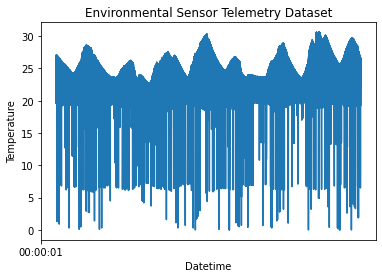

In [104]:
# Create a line graph of the data
plt.plot(df['temp'])
plt.title('Environmental Sensor Telemetry Dataset')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.show()

## Trend analysis

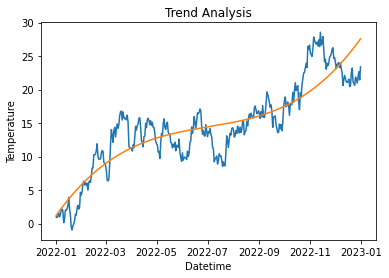

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generate sample data
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
df = pd.DataFrame({'Date': dates, 'temp': np.random.randn(len(dates)).cumsum()})
df.set_index('Date', inplace=True)

# fit a polynomial trendline
x = np.arange(len(df))
y = df['temp'].values
poly_fit = np.poly1d(np.polyfit(x, y, deg=3))

plt.plot(df.index.values, y)
plt.plot(df.index.values, poly_fit(x))
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.title('Trend Analysis')
plt.show()


## Seasonality analysis

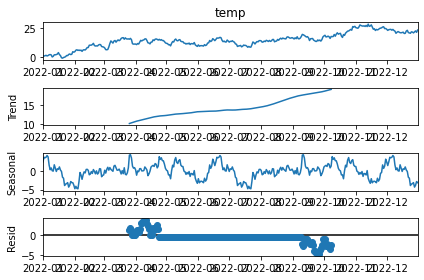

In [107]:
res = seasonal_decompose(df['temp'], period=24*7)
res.plot()
plt.show()


In [111]:
df.head()

,temp
Date,
2022-01-01,0.972291
2022-01-02,0.894842
2022-01-03,1.170765
2022-01-04,1.555107
2022-01-05,0.982807


## Forecasting using an ARIMA model

In [108]:
model = ARIMA(df['temp'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=24*7)
print(forecast)

2023-01-01    23.325345
2023-01-02    23.280090
2023-01-03    23.240759
2023-01-04    23.206576
2023-01-05    23.176867
                ...    
2023-06-13    22.979594
2023-06-14    22.979594
2023-06-15    22.979594
2023-06-16    22.979594
2023-06-17    22.979594
Freq: D, Name: predicted_mean, Length: 168, dtype: float64


## Metrics

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate the mean absolute error and root mean squared error
y_true = df['temp'].values
y_pred = model_fit.predict()
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('Mean absolute error:', mae)
print('Root mean squared error:', rmse)

Mean absolute error: 0.8095670019845609
Root mean squared error: 1.022659698315157


#### Considering the IoT telemetry dataset from kaggle.

The dataset has 9 columns:

    1.Date
    2.Device
    3.CO
    4.Humidity
    5.Light
    6.Lpg
    7.Smoke
    8.Motion
    9.Temperature
### Steps in time series analysis:
1.Data is loaded and cleaned without missing values.

2.Date is set as the index of the dataframe.

3.Trend analysis is performed by fitting a polynomial trendline.

4.Seasonality analysis is done using seasonal decompose.

5.ARIMA model is used to forecast.

6.Mean absolute error and root mean squared error are computed.

#### Results: 
The predictions are close to accuracy from the built model.